In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.trust_region.trust_region import TrustRegion

In [4]:
def plot_contour(f, xs=10, ys=10, lines=50):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, lines)

In [5]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))

def print_meta_state(meta, m, latest_point):
    print("delta for next iter", meta['delta'])
    print("rho", meta['rho'])
    print("p", meta['direction'])
    print("p_norm", np.linalg.norm(meta['direction'][0]))
    print("m", m(meta['direction'][0], latest_point))
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8], lambda_init=1, delta_init=100, max_iterations=1000):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def m(p, x):
        return F.f(x) + np.array(F.gradient(x)).T @ p + 0.5 * p.T @ F.hessian(x) @ p
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def meta_f(meta):
        if debug:
            print_meta_state(meta, m, xk_at_i[-1])
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, lambda_init=lambda_init, delta_init=delta_init, meta_callback=meta_f, max_iterations=max_iterations))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [6]:
def plot_delta_from_function(minimize, F, g_tol=0.5, debug=False, start_point=[8,8], delta_init=10, lambda_init=1):
    delta_at_i = []
    p_at_i = []
    rho_at_i = []
    x_at_i = []
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        x_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def m(meta):
        delta_at_i.append(meta['delta'])
        p_at_i.append(meta['direction'])
        rho_at_i.append(meta['rho'])
    minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, meta_callback=m, delta_init=delta_init, lambda_init=lambda_init)
    plt.xlabel('iterations')
    plt.ylabel('trust region radius')
    plt.plot(delta_at_i)
    return delta_at_i, p_at_i, rho_at_i, x_at_i
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    #plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    #plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

DELTA 0.001
The newton step is outside the trust region 11.313708498984761
DELTA 0.001
The newton step is outside the trust region 11.313708498984761
-----
norm of p:  0.001
delta:  0.001
delta 0.001 rho 0.9999999999995453 p_norm 0.001
increased delta!
DELTA 0.002
The newton step is outside the trust region 11.313000707416744
DELTA 0.002
The newton step is outside the trust region 11.313000707416744
-----
norm of p:  0.0020000000000000005
delta:  0.002
delta 0.002 rho 0.9999999999997725 p_norm 0.0020000000000000005
increased delta!
DELTA 0.004
The newton step is outside the trust region 11.311585256278063
DELTA 0.004
The newton step is outside the trust region 11.311585256278063
-----
norm of p:  0.004
delta:  0.004
delta 0.004 rho 1.0000000000001137 p_norm 0.004
increased delta!
DELTA 0.008
The newton step is outside the trust region 11.308754882220342
DELTA 0.008
The newton step is outside the trust region 11.308754882220342
-----
norm of p:  0.008
delta:  0.008
delta 0.008 rho 1.000

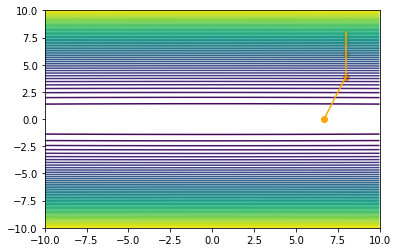

In [8]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=10000, delta_init=0.001, start_point=[8,8])

The newton step is outside the trust region 11.313708498984761
lambda 0
lambda 31.999718000282
lambda 523314.7435141735
The newton step is outside the trust region 11.313708498984761
lambda 0
lambda 31.999718000282
lambda 523314.7435141735
-----
norm of p:  5.793652968429255e-07
delta:  0.001
delta 0.001 rho 1.0000000015698114 p_norm 5.793652968429255e-07
increased delta!
The newton step is outside the trust region 11.313708909067365
lambda 0
lambda 31.999470317987516
lambda 523294.95552541746
The newton step is outside the trust region 11.313708909067365
lambda 0
lambda 31.999470317987516
lambda 523294.95552541746
-----
norm of p:  2.515459436613288e-07
delta:  0.002
delta 0.002 rho 0.9999999945765723 p_norm 2.515459436613288e-07
increased delta!
The newton step is outside the trust region 11.313709087114997
lambda 0
lambda 31.998971324668933
lambda 523255.1009582498
The newton step is outside the trust region 11.313709087114997
lambda 0
lambda 31.998971324668933
lambda 523255.1009582

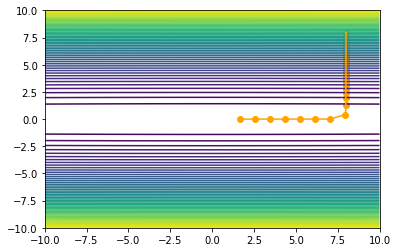

In [18]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=0, delta_init=0.001)

-----
norm of p:  11.313708498984761
delta:  100
delta 100 rho 1.0 p_norm 11.313708498984761
[0. 0.]


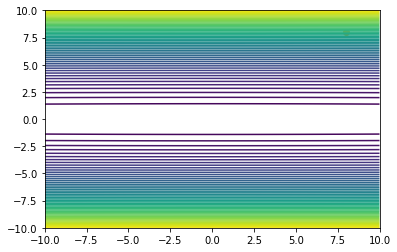

In [9]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1)

-----
norm of p:  11.313708498984761
delta:  100
delta 100 rho 1.0 p_norm 11.313708498984761
[0. 0.]


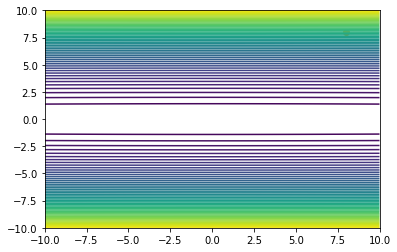

In [10]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e3, delta_init=100)

The newton step is outside the trust region 11.313708498984761
p [-4.01768524 -7.99207828]
||p|| 8.945116541942014
p [-0.4676945  -7.87320066]
||p|| 7.887079738621785
p [-0.01536151 -5.26391282]
||p|| 5.263935238312371
p [-0.00409916 -2.71129339]
||p|| 2.711296492113245
p [-0.00182719 -1.48773293]
||p|| 1.4877340502045182
p [-0.00118169 -1.02973642]
||p|| 1.0297371014223766
p [-0.00115722 -1.01110833]
||p|| 1.0111089956627999
p [-0.00116448 -1.01664462]
||p|| 1.0166452864016253
p [-0.00115368 -1.00840176]
||p|| 1.0084024169203414
p [-0.0011584  -1.01200423]
||p|| 1.0120048916361701
p [-0.00115164 -1.00684133]
||p|| 1.006841990900618
p [-0.00115508 -1.00947004]
||p|| 1.009470701869392
p [-0.00115028 -1.00580359]
||p|| 1.0058042516014891
p [-0.00115295 -1.00784719]
||p|| 1.0078478521387024
p [-0.0011493  -1.00505589]
||p|| 1.0050565511996719
p [-0.00115147 -1.00671113]
||p|| 1.0067117897443514
p [-0.00114856 -1.00448822]
||p|| 1.0044888753322707
p [-0.00115036 -1.00586833]
||p|| 1.005868

p [-1.44028370e+00 -5.47856938e-10]
||p|| 1.4402837040154062
p [-1.42680704e+00 -5.47845507e-10]
||p|| 1.4268070448841725
p [-1.43237730e+00 -5.47850258e-10]
||p|| 1.4323773026221183
p [-1.42433142e+00 -5.47843384e-10]
||p|| 1.4243314193403893
p [-1.42831225e+00 -5.47846794e-10]
||p|| 1.428312247831174
p [-1.42272753e+00 -5.47842004e-10]
||p|| 1.422727534219515
p [-1.42578378e+00 -5.47844630e-10]
||p|| 1.4257837794406747
p [-1.42159016e+00 -5.47841024e-10]
||p|| 1.421590157701033
p [-1.42404474e+00 -5.47843137e-10]
||p|| 1.4240447374803307
p [-1.42073593e+00 -5.47840287e-10]
||p|| 1.4207359333038365
p [-1.42276999e+00 -5.47842041e-10]
||p|| 1.4227699866317771
p [-1.42006808e+00 -5.47839710e-10]
||p|| 1.4200680811175799
p [-1.42179313e+00 -5.47841199e-10]
||p|| 1.4217931253920524
p [-1.41953012e+00 -5.47839244e-10]
||p|| 1.4195301224277492
p [-1.42101949e+00 -5.47840531e-10]
||p|| 1.4210194859741363
p [-1.41908665e+00 -5.47838861e-10]
||p|| 1.4190866529783372
p [-1.42039099e+00 -5.47839

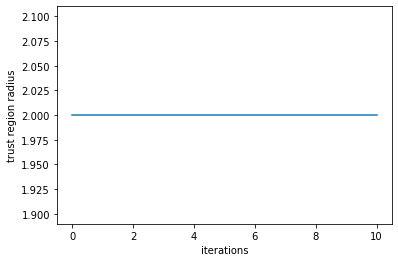

In [15]:
deltas_ellipsoid, ps_ellipsoid, rhos_ellipsoid, xs_ellipsoid = plot_delta_from_function(TrustRegion.minimize, Ellipsoid, delta_init=1)

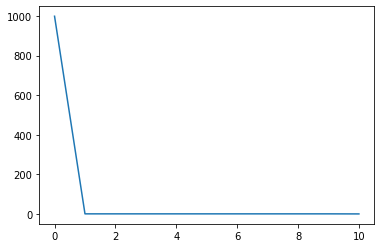

In [16]:
norms_ellipsoid = []
for p in ps_ellipsoid:
    norms_ellipsoid.append(np.linalg.norm(p[0]))
plt.plot((np.append(np.array([1e3]), np.array(deltas_ellipsoid)[:-1]) - np.array(norms_ellipsoid)))

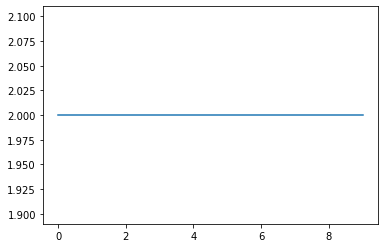

In [18]:
plt.plot(deltas_ellipsoid[0:10])

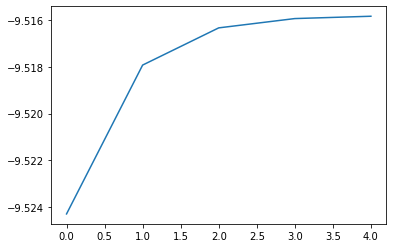

In [14]:
plt.plot(rhos_ellipsoid[0:5])

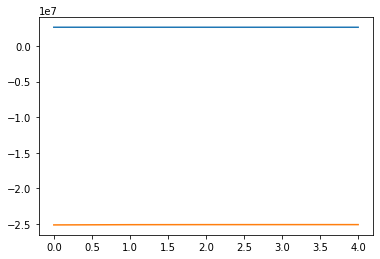

In [15]:
def m(p, x):
    return Ellipsoid.f(x) + np.array(Ellipsoid.gradient(x)).T @ p + 0.5 * p.T @ Ellipsoid.hessian(x) @ p
plt.plot([m(np.zeros(len(x)), x) - m(p, x) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
plt.plot([Ellipsoid.f(x) - Ellipsoid.f(x + p) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
#plt.plot(rhos_ellipsoid[0:5])
#plt.plot(deltas_ellipsoid[0:5])

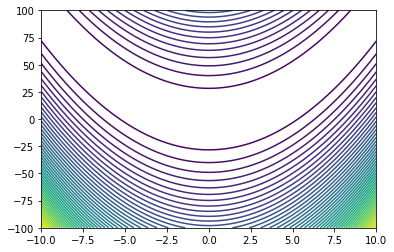

In [16]:
plot_contour(Rosenbrock.f, xs=10, ys=100)

DELTA 100
DELTA 100
-----
norm of p:  55.990000896265144
delta:  100
delta 100 rho 1.0000000139484018 p_norm 55.990000896265144
DELTA 100
The newton step is outside the trust region 112.19102302668202
DELTA 100
The newton step is outside the trust region 112.19102302668202
-----
norm of p:  100.00000000026613
delta:  100
delta 100 rho -3127.5297148528903 p_norm 100.00000000026613
DELTA 25.0
The newton step is outside the trust region 112.19102302668202
DELTA 25.0
The newton step is outside the trust region 112.19102302668202
-----
norm of p:  24.99999999999584
delta:  25.0
delta 25.0 rho -29.42515552475905 p_norm 24.99999999999584
DELTA 6.25
The newton step is outside the trust region 112.19102302668202
DELTA 6.25
The newton step is outside the trust region 112.19102302668202
-----
norm of p:  6.250000000000678
delta:  6.25
delta 6.25 rho 0.587064931371364 p_norm 6.250000000000678
DELTA 6.25
DELTA 6.25
-----
norm of p:  3.1441076913405435
delta:  6.25
delta 6.25 rho 1.3212491156702135 

DELTA 0.390625
The newton step is outside the trust region 0.7420043224839088
-----
norm of p:  0.3906249999999917
delta:  0.390625
delta 0.390625 rho 1.0071514207370484 p_norm 0.3906249999999917
increased delta!
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.32398519138982973
delta:  0.78125
delta 0.78125 rho 1.2920431287113552 p_norm 0.32398519138982973
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.2437752261652996
delta:  0.78125
delta 0.78125 rho 1.310122058630759 p_norm 0.2437752261652996
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.2180959322202578
delta:  0.78125
delta 0.78125 rho 1.2567311857667538 p_norm 0.2180959322202578
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.13567526177022685
delta:  0.78125
delta 0.78125 rho 1.2768401641126796 p_norm 0.13567526177022685
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.11694353990386766
delta:  0.78125
delta 0.78125 rho 1.1930193958923387 p_norm 0.11694353990386766
DELTA 0.78125
DELTA 0.78125
-----
norm of p:  0.04778998285860

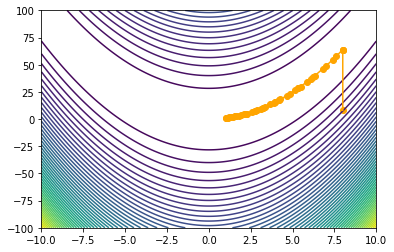

In [9]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100)

DELTA 1
The newton step is outside the trust region 55.990000896265144
DELTA 1
The newton step is outside the trust region 55.990000896265144
-----
norm of p:  1.0000000000000002
delta:  1
delta 1 rho 1.0216432806118534 p_norm 1.0000000000000002
increased delta!
DELTA 2
The newton step is outside the trust region 40.95420627092963
DELTA 2
The newton step is outside the trust region 40.95420627092963
-----
norm of p:  2.0000000000000004
delta:  2
delta 2 rho 1.1510863308463404 p_norm 2.0000000000000004
increased delta!
DELTA 4
The newton step is outside the trust region 17.417154251331933
DELTA 4
The newton step is outside the trust region 17.417154251331933
-----
norm of p:  4.000000000000001
delta:  4
delta 4 rho 1.1020630486613887 p_norm 4.000000000000001
increased delta!
DELTA 8
DELTA 8
-----
norm of p:  4.394718918969227
delta:  8
delta 8 rho 1.000005636160364 p_norm 4.394718918969227
DELTA 8
The newton step is outside the trust region 25.89086743375078
DELTA 8
The newton step is o

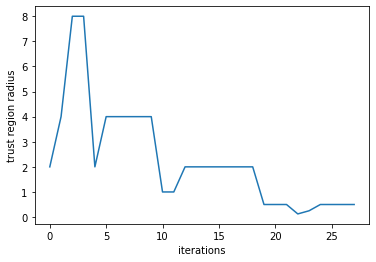

In [10]:
deltas_rosenbrock, ps_rosenbrock, rhos_rosenbrock, xs_rosenbrock = plot_delta_from_function(TrustRegion.minimize, Rosenbrock, delta_init=1)

DELTA 1
The newton step is outside the trust region 11.313711255607725
DELTA 1
The newton step is outside the trust region 11.313711255607725
-----
norm of p:  1.0
delta:  1
delta 1 rho 1.1393015299669698 p_norm 1.0
increased delta!
DELTA 2
The newton step is outside the trust region 10.629290679732147
DELTA 2
The newton step is outside the trust region 10.629290679732147
-----
norm of p:  2.0
delta:  2
delta 2 rho 1.373165213669682 p_norm 2.0
increased delta!
DELTA 4
The newton step is outside the trust region 9.43031546622029
DELTA 4
The newton step is outside the trust region 9.43031546622029
-----
norm of p:  4.0
delta:  4
delta 4 rho 3.299730537604354 p_norm 4.0
increased delta!
DELTA 8
The newton step is outside the trust region 8.028014185049818
DELTA 8
The newton step is outside the trust region 8.028014185049818
-----
norm of p:  8.000000000000002
delta:  8
delta 8 rho 14.09269770652034 p_norm 8.000000000000002
increased delta!
DELTA 16
the smallest eigenvalue negative or 0
DE

DELTA 0.00048828125
the smallest eigenvalue negative or 0
-----
norm of p:  0.00048828124999999995
delta:  0.00048828125
delta 0.00048828125 rho 0.6833408347553895 p_norm 0.00048828124999999995
DELTA 0.00048828125
the smallest eigenvalue negative or 0
DELTA 0.00048828125
the smallest eigenvalue negative or 0
-----
norm of p:  0.00048828124999999995
delta:  0.00048828125
delta 0.00048828125 rho 0.6973587043012021 p_norm 0.00048828124999999995
DELTA 0.00048828125
the smallest eigenvalue negative or 0
DELTA 0.00048828125
the smallest eigenvalue negative or 0
-----
norm of p:  0.0004882812500000001
delta:  0.00048828125
delta 0.00048828125 rho 0.7113687702680767 p_norm 0.0004882812500000001
DELTA 0.00048828125
the smallest eigenvalue negative or 0
DELTA 0.00048828125
the smallest eigenvalue negative or 0
-----
norm of p:  0.00048828125
delta:  0.00048828125
delta 0.00048828125 rho 0.7253377070912819 p_norm 0.00048828125
DELTA 0.00048828125
the smallest eigenvalue negative or 0
DELTA 0.0004

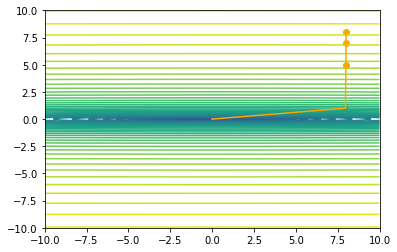

In [14]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid, delta_init=1)

DELTA 100
DELTA 100
-----
norm of p:  5.656924960170499
delta:  100
delta 100 rho 1.500012499921875 p_norm 5.656924960170499
DELTA 100
DELTA 100
-----
norm of p:  2.82846248008525
delta:  100
delta 100 rho 1.500024999999996 p_norm 2.82846248008525
DELTA 100
DELTA 100
-----
norm of p:  1.4142312400426247
delta:  100
delta 100 rho 1.5000500006249766 p_norm 1.4142312400426247
DELTA 100
DELTA 100
-----
norm of p:  0.7071156200213121
delta:  100
delta 100 rho 1.5001000037498906 p_norm 0.7071156200213121
DELTA 100
DELTA 100
-----
norm of p:  0.35355781001065617
delta:  100
delta 100 rho 1.5002000174995307 p_norm 0.35355781001065617
DELTA 100
DELTA 100
-----
norm of p:  0.17677890500532803
delta:  100
delta 100 rho 1.5004000749980497 p_norm 0.17677890500532803
DELTA 100
DELTA 100
-----
norm of p:  0.088389452502664
delta:  100
delta 100 rho 1.5008003099919203 p_norm 0.088389452502664
DELTA 100
DELTA 100
-----
norm of p:  0.04419472625133199
delta:  100
delta 100 rho 1.5016012599649635 p_norm 

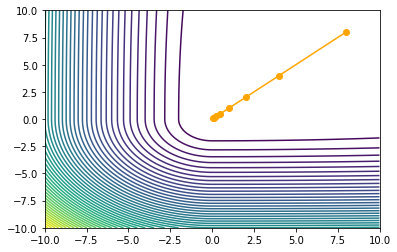

In [11]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector)

DELTA 100
DELTA 100
-----
norm of p:  8.432740427115679
delta:  100
delta 100 rho 1.1990387333898784 p_norm 8.432740427115679
DELTA 100
DELTA 100
-----
norm of p:  1.7777777777777781
delta:  100
delta 100 rho 1.2037037037037037 p_norm 1.7777777777777781
DELTA 100
DELTA 100
-----
norm of p:  1.1851851851851851
delta:  100
delta 100 rho 1.203703703703704 p_norm 1.1851851851851851
DELTA 100
DELTA 100
-----
norm of p:  0.7901234567901234
delta:  100
delta 100 rho 1.2037037037037035 p_norm 0.7901234567901234
DELTA 100
DELTA 100
-----
norm of p:  0.5267489711934157
delta:  100
delta 100 rho 1.2037037037037035 p_norm 0.5267489711934157
DELTA 100
DELTA 100
-----
norm of p:  0.3511659807956105
delta:  100
delta 100 rho 1.2037037037037037 p_norm 0.3511659807956105
DELTA 100
DELTA 100
-----
norm of p:  0.23411065386374041
delta:  100
delta 100 rho 1.2037037037037033 p_norm 0.23411065386374041
DELTA 100
DELTA 100
-----
norm of p:  0.15607376924249355
delta:  100
delta 100 rho 1.2037037037037033 p_

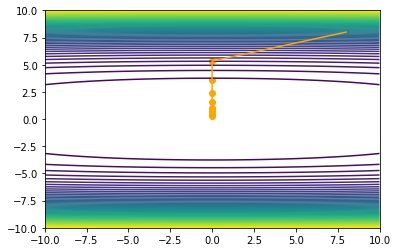

In [13]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, debug=False)

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))

In [ ]:
np.linalg.norm(np.array([-1/np.sqrt(2), -1/np.sqrt(2)]))

In [ ]:
q_1 = np.array([0.99905465, -0.04347186])
lambda1 = 7.37412416e+04
